In [1090]:
import pandas as pd    #IMPORTING PYTHON LIBRARIES TO LOAD DATASET 
import numpy as np    
import matplotlib.pyplot as plt   #FOR VISUALIZATION OF DATASET 
import seaborn as sns #FOR VISUALIZATION OF DATASET
import sklearn.preprocessing as LabelEncoder   #LabelEncoder for feature engineering 
import sklearn.model_selection as train_test_split   #FOR SPLITTING DATA FOR ML- MODEL AS TEST AND TRAIN
from scipy import stats
import plotly.express as px  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge , Lasso
from sklearn.cluster import KMeans

AIR QUALITY DATASET WHICH 


In [1091]:
df = pd.read_csv(r"C:\Users\mansi\Downloads\machine_learning_project\Air_Quality.csv")   #LOADING DATASET USING PANDAS 
df.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,NaN


In [1092]:
df.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [1093]:
df['Message']  # it does not contain any  value , it is just a random column  which need to be dropped


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
18857   NaN
18858   NaN
18859   NaN
18860   NaN
18861   NaN
Name: Message, Length: 18862, dtype: float64

In [1094]:
data = df.drop(columns= ['Message'])
data


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00
...,...,...,...,...,...,...,...,...,...,...,...
18857,165993,375,Nitrogen dioxide (NO2),Mean,ppb,CD,207,Kingsbridge Heights and Bedford (CD7),Winter 2012-13,12/01/2012,25.78
18858,338255,386,Ozone (O3),Mean,ppb,CD,107,Upper West Side (CD7),Summer 2015,06/01/2015,28.13
18859,651029,386,Ozone (O3),Mean,ppb,CD,307,Sunset Park (CD7),Summer 2019,06/01/2019,28.78
18860,667628,375,Nitrogen dioxide (NO2),Mean,ppb,CD,207,Kingsbridge Heights and Bedford (CD7),Winter 2019-20,12/01/2019,23.68


In [1095]:
data[['Unique ID' , 'Indicator ID']]   #HERE UNIQUE ID IS OF NO USE AS WE HAVE ALREADY A INDICATOR ID 

,Unique ID,Indicator ID
0,336867,375
1,336741,375
2,550157,375
3,412802,375
4,412803,375
...,...,...
18857,165993,375
18858,338255,386
18859,651029,386
18860,667628,375


IT IS INFORMATION OF NEW YORK CITY , IT CONTAIN NAME OF POLLUTION AND GEOGRAPHIC TYPE NAME OF PLACE , HOW TO MEASURE THIS , GEO JOIN ID (IDK), GEO PLACE NAME IS SPECIFIC NAME OF THE PLACE GICEN , TIME PERIOD IS GIVEN AND START DATE ALONG WITH DATA VALUE OF AIR 


In [1096]:
data = data.drop(columns=['Unique ID'])

In [1097]:
data.head(5)     #UPDATED DATA WITH DROPPPED COLUMN

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97
1,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42
2,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55
3,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63
4,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00


In [1098]:
data['Data Value']

0        23.97
1        27.42
2        12.55
3        22.63
4        14.00
         ...  
18857    25.78
18858    28.13
18859    28.78
18860    23.68
18861    23.77
Name: Data Value, Length: 18862, dtype: float64

In [1099]:
data['Measure Info'].unique()

array(['ppb', 'mcg/m3', 'number', 'per 100,000 adults', 'per square mile',
       'per 100,000 children', 'Âµg/m3', 'per 100,000'], dtype=object)

In [1100]:
data['Time Period'].unique()

array(['Winter 2014-15', 'Annual Average 2017', 'Winter 2015-16',
       'Summer 2016', 'Annual Average 2018', 'Annual Average 2016',
       'Winter 2021-22', 'Annual Average 2021', 'Summer 2009',
       'Winter 2010-11', 'Annual Average 2013', 'Summer 2021',
       'Winter 2020-21', 'Summer 2010', 'Summer 2011', 'Summer 2012',
       'Summer 2013', 'Winter 2013-14', 'Annual Average 2019',
       'Winter 2017-18', 'Annual Average 2022', 'Winter 2008-09',
       'Summer 2019', 'Summer 2015', 'Winter 2019-20',
       'Annual Average 2023', 'Winter 2022-23', 'Winter 2012-13',
       'Annual Average 2010', 'Annual Average 2012', 'Summer 2022',
       'Annual Average 2014', 'Summer 2020', '2015',
       'Annual Average 2015', 'Summer 2014', 'Winter 2018-19', '2013',
       'Winter 2011-12', 'Summer 2017', 'Summer 2018', 'Summer 2023',
       'Winter 2016-17', 'Winter 2009-10', 'Annual Average 2009',
       'Annual Average 2011', 'Annual Average 2020', '2012-2014',
       '2015-2017', '2005'

In [1101]:
data[['Indicator ID' , 'Name' , 'Measure Info']].value_counts()

Indicator ID  Name                                                    Measure Info        
365           Fine particles (PM 2.5)                                 mcg/m3                  6345
375           Nitrogen dioxide (NO2)                                  ppb                     6345
386           Ozone (O3)                                              ppb                     2115
643           Annual vehicle miles traveled                           per square mile          321
644           Annual vehicle miles traveled (cars)                    per square mile          321
645           Annual vehicle miles traveled (trucks)                  per square mile          321
650           Respiratory hospitalizations due to PM2.5 (age 20+)     per 100,000 adults       240
659           Asthma emergency departments visits due to Ozone        per 100,000 adults       240
657           Asthma emergency department visits due to PM2.5         per 100,000 adults       240
655           Asth

In [1102]:
data.duplicated().sum()    #THERE IS NO DUPLOCATED VALUE IN THIS DATASET

0

In [1103]:
data.isnull().sum()   #THERE IS NO NULL VALUE 

Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [1104]:
data.info()   #fetaching informationa and data type of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator ID    18862 non-null  int64  
 1   Name            18862 non-null  object 
 2   Measure         18862 non-null  object 
 3   Measure Info    18862 non-null  object 
 4   Geo Type Name   18862 non-null  object 
 5   Geo Join ID     18862 non-null  int64  
 6   Geo Place Name  18862 non-null  object 
 7   Time Period     18862 non-null  object 
 8   Start_Date      18862 non-null  object 
 9   Data Value      18862 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.4+ MB


In [1105]:
data['Measure'].value_counts()   

Measure
Mean                                    14805
Million miles                             963
Estimated annual rate (age 18+)           720
Estimated annual rate                     720
Estimated annual rate (under age 18)      720
Annual average concentration              406
Number per km2                            288
Estimated annual rate (age 30+)           240
Name: count, dtype: int64

In [1106]:
data['Measure Info'].value_counts()

Measure Info
ppb                     8460
mcg/m3                  6345
per 100,000 adults      1440
per square mile          963
per 100,000 children     720
Âµg/m3                   406
number                   288
per 100,000              240
Name: count, dtype: int64

In [1107]:
data['Geo Type Name'].value_counts()

Geo Type Name
UHF42       7392
CD          6844
UHF34       3570
Borough      880
Citywide     176
Name: count, dtype: int64

In [1108]:
date_from_date = pd.to_datetime(data['Start_Date'] , dayfirst= True, errors='coerce')   #EXTRACTING MONTH, YEAR AND DAY FROM DATE COLUMN 
year_from_date = pd.to_datetime(data['Start_Date'] , dayfirst= True , errors='coerce')
month_from_date = pd.to_datetime(data['Start_Date'] , dayfirst=True , errors='coerce')
data['date']  = date_from_date.dt.day.fillna(0).astype(int)   #FILLING THE NAn VALUE AND GETTING INT VALUE AS EXTRACTED 
data['year']  = year_from_date.dt.year.fillna(0).astype(int)
data['month'] = month_from_date.dt.month.fillna(0).astype(int)

In [1109]:
data[['year','date','month']]

,year,date,month
0,2014,12,1
1,2014,12,1
2,2017,1,1
3,2015,12,1
4,2016,6,1
...,...,...,...
18857,2012,12,1
18858,2015,6,1
18859,2019,6,1
18860,2019,12,1


In [1110]:
data = data.drop(columns = ['Start_Date'])

In [1111]:
data['season'] = data['Time Period'].str.extract(r'(Winter|Annual Average|Summer)' , expand  =False)

In [1112]:
data = data.drop(columns = 'Time Period')

In [1113]:
data.head(5)

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,date,year,month,season
0,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),23.97,12,2014,1,Winter
1,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),27.42,12,2014,1,Winter
2,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),12.55,1,2017,1,Annual Average
3,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),22.63,12,2015,1,Winter
4,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),14.00,6,2016,1,Summer


In [1114]:
data[['Measure Info']].value_counts()

Measure Info        
ppb                     8460
mcg/m3                  6345
per 100,000 adults      1440
per square mile          963
per 100,000 children     720
Âµg/m3                   406
number                   288
per 100,000              240
Name: count, dtype: int64

In [1115]:
data = data.drop(columns= ['Geo Place Name','Measure' , 'Measure Info'] , axis  = 1)

In [1116]:
data.head(5)

,Indicator ID,Name,Geo Type Name,Geo Join ID,Data Value,date,year,month,season
0,375,Nitrogen dioxide (NO2),CD,407,23.97,12,2014,1,Winter
1,375,Nitrogen dioxide (NO2),CD,107,27.42,12,2014,1,Winter
2,375,Nitrogen dioxide (NO2),CD,414,12.55,1,2017,1,Annual Average
3,375,Nitrogen dioxide (NO2),CD,407,22.63,12,2015,1,Winter
4,375,Nitrogen dioxide (NO2),CD,407,14.00,6,2016,1,Summer


In [1117]:
data['season'] = data['season'].map({'Winter': 1 , 'Annual Average': 2, 'Summer': 3})  #ASSIGNING NUMERICAL CATEGORICAL VALUES TO SEASON 

In [1118]:
data['season']

0        1.0
1        1.0
2        2.0
3        1.0
4        3.0
        ... 
18857    1.0
18858    3.0
18859    3.0
18860    1.0
18861    2.0
Name: season, Length: 18862, dtype: float64

In [1119]:
tt ={
    'CD': 0,
    'UHF42' : 1 ,
    'UHF34': 2, 
    'Borough' : 3,
    'Citywide': 4
}

data['Geo Type Name'] = data['Geo Type Name'].map(tt)

In [1120]:
data['Name'].unique()

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)',
       'Boiler Emissions- Total SO2 Emissions', 'Ozone (O3)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Asthma hospitalizations due to Ozone',
       'Boiler Emissions- Total NOx Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene',
       'Asthma emergency departments visits due to Ozone',
       'Annual vehicle miles traveled (cars)',
       'Annual vehicle miles traveled (trucks)',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Deaths due to PM2.5',
       'Cardiac and respiratory deaths due to Ozone'], dtype=object)

In [1121]:
data = pd.get_dummies(data, columns = ['Name'], dtype = int)

In [1122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 26 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Indicator ID                                                 18862 non-null  int64  
 1   Geo Type Name                                                18862 non-null  int64  
 2   Geo Join ID                                                  18862 non-null  int64  
 3   Data Value                                                   18862 non-null  float64
 4   date                                                         18862 non-null  int32  
 5   year                                                         18862 non-null  int32  
 6   month                                                        18862 non-null  int32  
 7   season                                                       14805 non-null 

In [1123]:
data.describe()

,Indicator ID,Geo Type Name,Geo Join ID,Data Value,date,year,month,season,Name_Annual vehicle miles traveled,Name_Annual vehicle miles traveled (cars),...,Name_Boiler Emissions- Total SO2 Emissions,Name_Cardiac and respiratory deaths due to Ozone,Name_Cardiovascular hospitalizations due to PM2.5 (age 40+),Name_Deaths due to PM2.5,Name_Fine particles (PM 2.5),Name_Nitrogen dioxide (NO2),Name_Outdoor Air Toxics - Benzene,Name_Outdoor Air Toxics - Formaldehyde,Name_Ozone (O3),Name_Respiratory hospitalizations due to PM2.5 (age 20+)
count,18862.000000,18862.000000,1.886200e+04,18862.000000,18862.000000,18862.000000,18862.000000,14805.000000,18862.000000,18862.000000,...,18862.000000,18862.000000,18862.000000,18862.000000,18862.000000,18862.000000,18862.000000,18862.000000,18862.000000,18862.000000
mean,431.817888,0.947726,5.983262e+05,21.051580,6.120613,1984.593892,1.010497,2.142857,0.017018,0.017018,...,0.005090,0.012724,0.012724,0.012724,0.336391,0.336391,0.010762,0.010762,0.112130,0.012724
std,113.946565,0.905551,7.819721e+06,23.564920,4.493865,244.549904,0.200725,0.833021,0.129343,0.129343,...,0.071162,0.112084,0.112084,0.112084,0.472487,0.472487,0.103185,0.103185,0.315535,0.112084
min,365.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.000000,0.000000,2.020000e+02,8.742004,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,375.000000,1.000000,3.030000e+02,14.790000,6.000000,2015.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,386.000000,1.000000,4.040000e+02,26.267500,12.000000,2019.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,661.000000,4.000000,1.051061e+08,424.700000,12.000000,2023.000000,2.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 26 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Indicator ID                                                 18862 non-null  int64  
 1   Geo Type Name                                                18862 non-null  int64  
 2   Geo Join ID                                                  18862 non-null  int64  
 3   Data Value                                                   18862 non-null  float64
 4   date                                                         18862 non-null  int32  
 5   year                                                         18862 non-null  int32  
 6   month                                                        18862 non-null  int32  
 7   season                                                       14805 non-null 

In [1125]:
data.dropna()   

,Indicator ID,Geo Type Name,Geo Join ID,Data Value,date,year,month,season,Name_Annual vehicle miles traveled,Name_Annual vehicle miles traveled (cars),...,Name_Boiler Emissions- Total SO2 Emissions,Name_Cardiac and respiratory deaths due to Ozone,Name_Cardiovascular hospitalizations due to PM2.5 (age 40+),Name_Deaths due to PM2.5,Name_Fine particles (PM 2.5),Name_Nitrogen dioxide (NO2),Name_Outdoor Air Toxics - Benzene,Name_Outdoor Air Toxics - Formaldehyde,Name_Ozone (O3),Name_Respiratory hospitalizations due to PM2.5 (age 20+)
0,375,0,407,23.97,12,2014,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,375,0,107,27.42,12,2014,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,375,0,414,12.55,1,2017,1,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,375,0,407,22.63,12,2015,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,375,0,407,14.00,6,2016,1,3.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18857,375,0,207,25.78,12,2012,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
18858,386,0,107,28.13,6,2015,1,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
18859,386,0,307,28.78,6,2019,1,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
18860,375,0,207,23.68,12,2019,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


<Axes: >

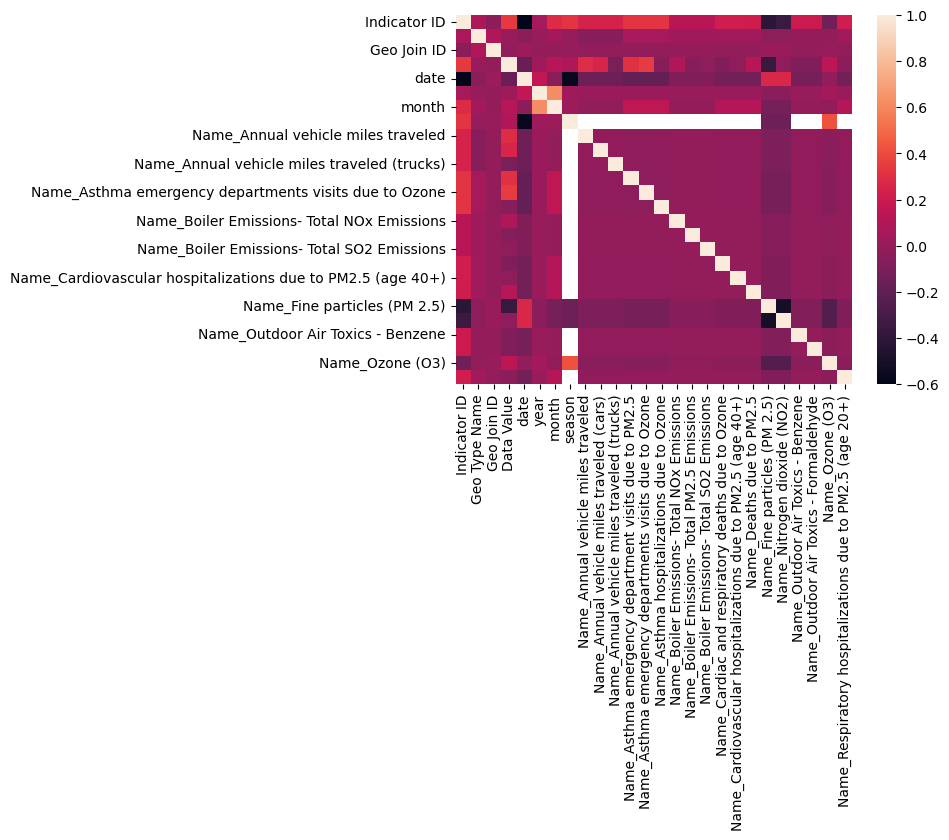

In [1126]:
sns.heatmap(data.corr())

In [1127]:
fig  = px.line_3d(data , x ='Data Value', 
                  y = 'Geo Type Name' , z = 'Indicator ID')
fig.show()

MODEL 1 - LINEAR REGRESSION ON MAIN 'DATA VALUE' AS TARGET COLUMN, WITH RESPECT TO LOCATION , TIME PERIOD , NAME OF POLLUTION. 

In [1128]:
data.isnull().sum()

Indicator ID                                                      0
Geo Type Name                                                     0
Geo Join ID                                                       0
Data Value                                                        0
date                                                              0
year                                                              0
month                                                             0
season                                                         4057
Name_Annual vehicle miles traveled                                0
Name_Annual vehicle miles traveled (cars)                         0
Name_Annual vehicle miles traveled (trucks)                       0
Name_Asthma emergency department visits due to PM2.5              0
Name_Asthma emergency departments visits due to Ozone             0
Name_Asthma hospitalizations due to Ozone                         0
Name_Boiler Emissions- Total NOx Emissions      

In [1129]:
# REMOVING NULL VALUE TO PREDICT BETTER 
data['season'] = data['season'].fillna(data['season'].mode()[0])

In [1130]:
data = data.dropna()

In [1131]:
X = data.drop(['Data Value','Indicator ID','Geo Join ID','date'], axis = 1)
y = data['Data Value']

In [1132]:
X_train,X_test,y_train,y_test  = train_test_split(X ,y, test_size=0.2 ,random_state=42)

In [1133]:
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(X_train) 
scaled_x_test = scaler.transform(X_test)


In [1134]:
model  = LinearRegression()
model.fit(scaled_x_train, y_train)

LinearRegression()

In [1135]:
y_pred = model.predict(scaled_x_test)

In [1136]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

316.4561080350675


In [1137]:
score = r2_score(y_test , y_pred)
print(score)

0.5064347905056048


In [1138]:
las = Lasso(alpha =0.5)
las.fit(scaled_x_train , y_train)
y_pred_lasss = las.predict(scaled_x_test)


In [1139]:
rid = Ridge(alpha = 0.5)
rid.fit(scaled_x_train , y_train)
y_pred_rig = rid.predict(scaled_x_test)
mse_rid = mean_squared_error(y_test, y_pred_rig)
print(mse_rid)
r2_lasso = r2_score(y_test, y_pred_rig)
print(r2_lasso)

316.45737828285536
0.5064328093458179


MODEL -2 K-MEAN CLUSTER TO UNDERSTAND PATTERN OF AIR POLLUTION DATASET

In [1140]:
feature = [col for col in data.columns if 'Name_' in col]
feature.append('Data Value')

In [1141]:
cluster_data_set = data[feature]

In [1142]:
scaler  = StandardScaler()
model = scaler.fit(cluster_data_set)

In [1143]:
Kmeans = KMeans(n_clusters= 4 , random_state=42)
data['cluster'] = Kmeans.fit_predict(cluster_data_set)

In [1144]:

from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)
pca_result = pca.fit_transform(cluster_data_set)

data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

fig = px.scatter(data, x='PCA1', y='PCA2', color='cluster',
                 title='K-Means Clustering Visualized via PCA')
fig.show()


In [1145]:
import plotly.express as px

fig = px.scatter(data, 
                 x='Geo Type Name', 
                 y='Data Value', 
                 color='cluster',
                 title='K-Means Clustering Based on Geo Type and Data Value',
                 labels={'Geo Type Name': 'Geo Type', 'Data Value': 'Pollution Impact'})
fig.show()


In [1146]:
print(data['cluster'].value_counts())


cluster
1    11552
0     6498
2      675
3      137
Name: count, dtype: int64


In [1147]:
cluster_avg = data.groupby('cluster')['Data Value'].mean().sort_values(ascending=False)
print(cluster_avg)


cluster
3    192.953820
2     91.477871
0     29.315883
1     10.249140
Name: Data Value, dtype: float64


In [1148]:
# Filter rows that belong to cluster 3
cluster_3_data = data[data['cluster'] == 3]
# Group by region and calculate average pollution
region_impact = cluster_3_data.groupby('Geo Join ID')['Data Value'].mean().sort_values(ascending=False)

# Display top 10 most affected regions
print(region_impact.head(10))



Geo Join ID
305    247.850000
302    243.654934
303    215.725182
106    202.961157
107    201.104289
304    200.645386
307    197.796445
105    196.634135
306    193.150000
103    180.433460
Name: Data Value, dtype: float64


In [1149]:
import plotly.express as px

# Reset index for plotting
region_impact_df = region_impact.reset_index().rename(columns={'Data Value': 'Avg Pollution Impact'})

# Bar plot
fig = px.scatter(region_impact_df.head(10), 
             x='Geo Join ID', 
             y='Avg Pollution Impact',
             title='Top 10 Most Polluted Regions (Cluster 3)',
             labels={'Geo Join ID': 'Region ID'})
fig.show()
